In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Euler method

The euler method is a one-step method for the numerical solution of an initial-value ODE problem. To set up notation, an **initial-value ODE problem** is an ODE
    $$ \frac{dy}{dx}= f(x,y) $$
with $y(x_0)=y_0$.

Picard's theorem on the existence of solutions to ODEs shows that for Lipschitz $f$ we can find local solutions. Assume this is the case. We would like to get a numerical approximation to the solution on the interval $[x_0,x_\text{end}]$.

Let $\Delta x = (x_\text{end}-x_0)/N$ be the step size. Then given $y(x_0)=y_0$, then the approximation
    $$ \frac{y_{n+1}-y_n}{\Delta x} \simeq f(x_n, y_n) $$
where $x_n = x_0 + n\Delta x$, gives the sequence of values $\{y_n\}_n$. This is the **euler method.**

In [2]:
def euler_integration(x0,X,y0,f,N):
    """
    Euler integration method for solving the ODE y' = f(x,y)
    INPUT:
        x0 = initial x value
        X = length of x-interval where local solution exists
        y0 = y(x0)
        f = a function of x, y
        N = number of time steps
    OUTPUT:
        x = list of t-values in [x0, x0+X]
        y = list of y-values given by the euler method
    """
    deltaX = X / N
    x = np.linspace(x0, x0+X, N+1)
    y = np.zeros(N+1)
    y[0] = y0
    for n in range(N):
        y[n+1] = y[n] + deltaX * f(x[n], y[n])
    return x, y

The euler method can be derived by the integrating the ODE above to get
    $$ y(x_{n+1}) = y(x_n) + \int_{x_n}^{x_{n+1}} f(x, y) dx $$
We can then approximate the integral as $f(x_n, y_n)\Delta x$, which gives the method.

An example of this numerical method is given by the **reversion to the mean** ODE. This is given by the equation
$$ d\sigma(t) = -\alpha(\sigma(t)-\sigma_\infty)dt $$

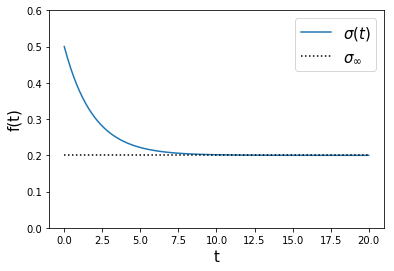

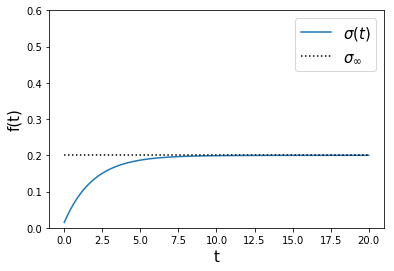

In [3]:
def mean_reversion_ODE(sigma_0):
    sigma_infty, alpha = .2, .5
    
    def a(t, sigma):
        return -alpha * (sigma - sigma_infty)
    
    t0, T, N = (0, 20, 100)
    
    t, sigma = euler_integration(t0, T, sigma_0, a, N)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(t, sigma, label='$\sigma(t)$')
    ax.plot([t[0], t[-1]], [sigma_infty, sigma_infty], 'k:', label='$\sigma_{\infty}$')
    ax.set_ybound(0,.6)
    ax.set_xlabel('t', fontsize=15)
    ax.set_ylabel('f(t)', fontsize=15)
    ax.legend(fontsize=15)
    plt.show()
    

mean_reversion_ODE(.5)
mean_reversion_ODE(.015)